# INM713 Semantic Web Technologies and Knowledge Graphs
## Coursework Project Part 2
##  Ontology Embeddings (Task Vector)

# 1. Import Libraries

In [2]:
from owl2vec_star import owl2vec_star

import sys
sys.path.append("../")

from rdflib import Graph
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import OWL, RDF, RDFS, FOAF, XSD
from rdflib.util import guess_format

import pandas as pd
import numpy as np

import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

import matplotlib.pyplot as plt

#Kmeans
from sklearn.cluster import KMeans

#Principle Componenet
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'matplotlib'

# Subtask Vector.1 Run OWL2Vec* with cw_onto and the generated data.
Code adapted from NM713 Semantic Web Technologies and Knowledge Graphs Lab 9

# 2. Load cw_onto and the Generated rdf and save as an owl file

In [38]:
g = Graph()

generated_RDF_data = "Generated RDF data.ttl"
cw_onto = "pizza-restaurants-ontology.owl"

g.load(generated_RDF_data,  format=guess_format(generated_RDF_data)) #e.g., format=ttl
g.load(cw_onto,  format=guess_format(cw_onto)) #e.g., format=ttl

g.serialize(destination='Task_vector.owl', format='xml') # Save as owl format for Owl2Vec
print("Data triples: '" + str(len(g)) + "'.")

Data triples: '6179'.


# 3. Run Owl2Vec 

### 3.1 Configuration 01

In [39]:
# Code adapted from NM713 Semantic Web Technologies and Knowledge Graphs Lab 9
#Parameters:

# DOCUMENT
# ontology_projection      = yes
# projection_only_taxonomy = no
# multiple_labels          = yes
# avoid_owl_constructs     = no
# save_document            = yes
# axiom_reasoner           = none

# walker                   = random
# walk_depth               = 3

# uri_doc                  = yes
# lit_doc                  = no
# mix_doc                  = no

# MODEL
# embed_size               = 100
# iteration                = 10
# window                   = 5
# min_count                = 1
# negative                 = 25
# seed                     = 42
# epoch                    = 100

Task_vector = 'Task_vector.owl'
gensim_model = owl2vec_star.extract_owl2vec_model(Task_vector, "./default_config1.cfg", True, True, False)
output_folder="./owl2vec_output/"

#Gensim format
gensim_model.save(output_folder+"Task_vector_config1.embeddings")
#Text format
gensim_model.wv.save_word2vec_format(output_folder+"Task_vector_config1.embeddings.txt", binary=False)
#Binary format
gensim_model.wv.save_word2vec_format(output_folder+"Task_vector_config1.embeddings_binary.txt", binary=True)

INFO: Access the ontology ...
INFO: There are 6180 triples in the ontology
INFO: Calculate the ontology projection ...
INFO: Creating ontology graph projection...
INFO: 	Extracting subsumption triples
INFO: 		Time extracting subsumption: 0.26727795600891113 seconds 
INFO: 	Extracting equivalence triples
INFO: 		Time extracting equivalences: 0.05285954475402832 seconds 
INFO: 	Extracting class membership triples.
INFO: 		Time extracting class membership: 1.9747169017791748 seconds 
INFO: 	Extracting sameAs triples
INFO: 		Time extracting sameAs: 0.3819875717163086 seconds 
INFO: 	Extracting triples associated to servesMenuItem
INFO: 		Time extracting triples for property: 0.3540830612182617 seconds 
INFO: 	Extracting triples associated to locatedInAdress
INFO: 		Time extracting triples for property: 0.3420586585998535 seconds 
INFO: 	Extracting triples associated to locatedInCountry
INFO: 		Time extracting triples for property: 0.327160120010376 seconds 
INFO: 	Extracting triples associ

INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 6 : training on 259711 raw words (168932 effective words) took 0.5s, 374008 effective words/s
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 7 : training on 259711 raw words (169040 effective words) took 0.4s, 381719 effective words/s
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thr

### 3.2 Configuration 02

In [40]:
# Code adapted from NM713 Semantic Web Technologies and Knowledge Graphs Lab 9
#Parameters:

# DOCUMENT
# ontology_projection      = yes
# projection_only_taxonomy = no
# multiple_labels          = yes
# avoid_owl_constructs     = no
# save_document            = yes
# axiom_reasoner           = none

# walker                   = random
# walk_depth               = 5 - INCREASED to 5 FROM 3

# uri_doc                  = yes
# lit_doc                  = yes - CHANGED to YES
# mix_doc                  = yes - CHANGED to YES

# MODEL
# embed_size               = 100
# iteration                = 10
# window                   = 5
# min_count                = 1
# negative                 = 25
# seed                     = 42
# epoch                    = 100

Task_vector = 'Task_vector.owl'
gensim_model = owl2vec_star.extract_owl2vec_model(Task_vector, "./default_config2.cfg", True, True, True)
output_folder="./owl2vec_output/"

#Gensim format
gensim_model.save(output_folder+"Task_vector_config2.embeddings")
#Text format
gensim_model.wv.save_word2vec_format(output_folder+"Task_vector_config2.embeddings.txt", binary=False)
#Binary format
gensim_model.wv.save_word2vec_format(output_folder+"Task_vector_config2.embeddings_binary.txt", binary=True)

INFO: Access the ontology ...
INFO: There are 6180 triples in the ontology
INFO: Calculate the ontology projection ...
INFO: Creating ontology graph projection...
INFO: 	Extracting subsumption triples
INFO: 		Time extracting subsumption: 0.11072874069213867 seconds 
INFO: 	Extracting equivalence triples
INFO: 		Time extracting equivalences: 0.044873714447021484 seconds 
INFO: 	Extracting class membership triples.
INFO: 		Time extracting class membership: 2.3678784370422363 seconds 
INFO: 	Extracting sameAs triples
INFO: 		Time extracting sameAs: 0.020954370498657227 seconds 
INFO: 	Extracting triples associated to servesMenuItem
INFO: 		Time extracting triples for property: 0.49367737770080566 seconds 
INFO: 	Extracting triples associated to locatedInAdress
INFO: 		Time extracting triples for property: 0.6153476238250732 seconds 
INFO: 	Extracting triples associated to locatedInCountry
INFO: 		Time extracting triples for property: 0.3211202621459961 seconds 
INFO: 	Extracting triples a

INFO: EPOCH 4 - PROGRESS: at 29.32% examples, 261113 words/s, in_qsize 15, out_qsize 0
INFO: EPOCH 4 - PROGRESS: at 70.83% examples, 311730 words/s, in_qsize 15, out_qsize 0
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 4 : training on 1468441 raw words (893627 effective words) took 2.7s, 329983 effective words/s
INFO: EPOCH 5 - PROGRESS: at 33.39% examples, 296774 words/s, in_qsize 14, out_qsize 1
INFO: EPOCH 5 - PROGRESS: at 72.88% examples, 324479 words/s, in_qsize 15, out_qsize 0
INFO: worker thread finished; a

### 3.3 Configuration 03

In [41]:
# Code adapted from NM713 Semantic Web Technologies and Knowledge Graphs Lab 9
#Parameters:

# DOCUMENT
# ontology_projection      = yes
# projection_only_taxonomy = no
# multiple_labels          = yes
# avoid_owl_constructs     = no
# save_document            = yes
# axiom_reasoner           = none

# walker                   = wl - CHANGED to WL
# walk_depth               = 3 

# uri_doc                  = yes
# lit_doc                  = yes - CHANGED to YES
# mix_doc                  = yes - CHANGED to YES

# MODEL
# embed_size               = 500 - CHANGED to 500 from 100
# iteration                = 10
# window                   = 5
# min_count                = 1
# negative                 = 25
# seed                     = 42
# epoch                    = 100

Task_vector = 'Task_vector.owl'
gensim_model = owl2vec_star.extract_owl2vec_model(Task_vector, "./default_config3.cfg", True, True, True)
output_folder="./owl2vec_output/"

#Gensim format
gensim_model.save(output_folder+"Task_vector_config3.embeddings")
#Text format
gensim_model.wv.save_word2vec_format(output_folder+"Task_vector_config3.embeddings.txt", binary=False)
#Binary format
gensim_model.wv.save_word2vec_format(output_folder+"Task_vector_config3.embeddings_binary.txt", binary=True)

INFO: Access the ontology ...
INFO: There are 6180 triples in the ontology
INFO: Calculate the ontology projection ...
INFO: Creating ontology graph projection...
INFO: 	Extracting subsumption triples
INFO: 		Time extracting subsumption: 0.1246650218963623 seconds 
INFO: 	Extracting equivalence triples
INFO: 		Time extracting equivalences: 0.07181334495544434 seconds 
INFO: 	Extracting class membership triples.
INFO: 		Time extracting class membership: 3.3091812133789062 seconds 
INFO: 	Extracting sameAs triples
INFO: 		Time extracting sameAs: 0.01698470115661621 seconds 
INFO: 	Extracting triples associated to servesMenuItem
INFO: 		Time extracting triples for property: 0.4976670742034912 seconds 
INFO: 	Extracting triples associated to locatedInAdress
INFO: 		Time extracting triples for property: 1.123995065689087 seconds 
INFO: 	Extracting triples associated to locatedInCountry
INFO: 		Time extracting triples for property: 0.4368317127227783 seconds 
INFO: 	Extracting triples associ

INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker thread finished; awaiting finish of 3 more threads
INFO: worker thread finished; awaiting finish of 2 more threads
INFO: worker thread finished; awaiting finish of 1 more threads
INFO: worker thread finished; awaiting finish of 0 more threads
INFO: EPOCH - 3 : training on 1206341 raw words (671279 effective words) took 3.0s, 224244 effective words/s
INFO: EPOCH 4 - PROGRESS: at 30.62% examples, 198099 words/s, in_qsize 15, out_qsize 0
INFO: EPOCH 4 - PROGRESS: at 68.80% examples, 225505 words/s, in_qsize 15, out_qsize 0
INFO: worker thread finished; awaiting finish of 7 more threads
INFO: worker thread finished; awaiting finish of 6 more threads
INFO: worker thread finished; awaiting finish of 5 more threads
INFO: worker thread finished; awaiting finish of 4 more threads
INFO: worker 

# 4. Load the generated vector embeddings

In [42]:
from gensim.models import KeyedVectors

#Configuration 01: Load Embedding vectors 
model_config1 = KeyedVectors.load("./owl2vec_output/Task_vector_config1.embeddings", mmap='r')
wv1 = model_config1.wv

#Configuration 02: Load Embedding vectors 
model_config2 = KeyedVectors.load("./owl2vec_output/Task_vector_config2.embeddings", mmap='r')
wv2 = model_config2.wv

#Configuration 03: Load Embedding vectors 
model_config3 = KeyedVectors.load("./owl2vec_output/Task_vector_config3.embeddings", mmap='r')
wv3 = model_config3.wv

INFO: loading Word2VecKeyedVectors object from ./owl2vec_output/Task_vector_config1.embeddings
INFO: loading wv recursively from ./owl2vec_output/Task_vector_config1.embeddings.wv.* with mmap=r
INFO: setting ignored attribute vectors_norm to None
INFO: loading vocabulary recursively from ./owl2vec_output/Task_vector_config1.embeddings.vocabulary.* with mmap=r
INFO: loading trainables recursively from ./owl2vec_output/Task_vector_config1.embeddings.trainables.* with mmap=r
INFO: setting ignored attribute cum_table to None
INFO: loaded ./owl2vec_output/Task_vector_config1.embeddings
INFO: loading Word2VecKeyedVectors object from ./owl2vec_output/Task_vector_config2.embeddings
INFO: loading wv recursively from ./owl2vec_output/Task_vector_config2.embeddings.wv.* with mmap=r
INFO: setting ignored attribute vectors_norm to None
INFO: loading vocabulary recursively from ./owl2vec_output/Task_vector_config2.embeddings.vocabulary.* with mmap=r
INFO: loading trainables recursively from ./owl2ve

# Subtask Vector.2 Select 6 pairs of entities (for any of the tested configurations) and discuss the similarity of their vectors

# 5. Calculate similarity of their vectors

## 5.1 Configuration 01

## Pairs expected to be different

In [43]:
#Pair 01: Comaparing Ingrediants - Black Olives and Chicken
similarity1 = wv1.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#BlackOlives', 'http://www.semanticweb.org/in3067-inm713/restaurants#Chicken')
print('Pair 01: Comaparing Ingrediants - Black Olives and Chicken similarity:', np.round(similarity1*100,2),'%')

#Pair 02: Comparing Pizzas - Vegan Pizza and Meat Pizza
similarity2 = wv1.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#VeganPizza', 'http://www.semanticweb.org/in3067-inm713/restaurants#MeatPizza')
print('Pair 02: Comparing Pizzas Types - Vegan Pizza and Meat Pizza:', np.round(similarity2*100,2),'%')

#Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark
similarity3 = wv1.similarity("http://www.semanticweb.org/in3067-inm713/restaurants#original_giorgio's_cockeysville", "http://www.semanticweb.org/in3067-inm713/restaurants#ming_garden_cocktails_chinese_restaurant_newark")
print("Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark:", np.round(similarity3*100,2),'%')

Pair 01: Comaparing Ingrediants - Black Olives and Chicken similarity: 84.79 %
Pair 02: Comparing Pizzas Types - Vegan Pizza and Meat Pizza: 96.46 %
Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark: 90.84 %


Configuration 01 does not distinguish between pairs expected to be disimilar

## Pairs expected to be similar

In [44]:
#Pair 04: Comaparing Ingrediants - Olives and GreenOlives
similarity4 = wv1.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#BlackOlives', 'http://www.semanticweb.org/in3067-inm713/restaurants#GreenOlives')
print('Pair 04: Comaparing Ingrediants - Black Olives and Green Olive similarity:', np.round(similarity4*100,2),'%')

#Pair 05: Comparing Pizzas -  PizzaNapolitana and MargheritaPizza
similarity5 = wv1.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#PizzaNapolitana', 'http://www.semanticweb.org/in3067-inm713/restaurants#MargheritaPizza')
print('Pair 05: Comparing Pizza Types - Pizza Napolitana and Margherita Pizza:', np.round(similarity5*100,2),'%')

#Pair 06: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark
similarity6 = wv1.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#pizza,_puttenesca_the_brentwood_los_angeles', 'http://www.semanticweb.org/in3067-inm713/restaurants#pizza_putanesca_the_brentwood_los_angeles')
print("Pair 06: Comparing Pizzas - pizza,_puttenesca_the_brentwood_los_angeles and pizza_putanesca_the_brentwood_los_angeles:", np.round(similarity6*100,2),'%')

Pair 04: Comaparing Ingrediants - Black Olives and Green Olive similarity: 93.62 %
Pair 05: Comparing Pizza Types - Pizza Napolitana and Margherita Pizza: 83.13 %
Pair 06: Comparing Pizzas - pizza,_puttenesca_the_brentwood_los_angeles and pizza_putanesca_the_brentwood_los_angeles: 86.72 %


## 5.2 Configuration 02

## Pairs expected to be different

In [45]:
#Pair 01: Comaparing Ingrediants - Black Olives and Chicken
similarity1 = wv2.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#BlackOlives', 'http://www.semanticweb.org/in3067-inm713/restaurants#Chicken')
print('Pair 01: Comaparing Ingrediants - Black Olives and Chicken similarity:', np.round(similarity1*100,2),'%')

#Pair 02: Comparing Pizzas - Vegan Pizza and Meat Pizza
similarity2 = wv2.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#VeganPizza', 'http://www.semanticweb.org/in3067-inm713/restaurants#MeatPizza')
print('Pair 02: Comparing Pizzas Types - Vegan Pizza and Meat Pizza:', np.round(similarity2*100,2),'%')

#Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark
similarity3 = wv2.similarity("http://www.semanticweb.org/in3067-inm713/restaurants#original_giorgio's_cockeysville", "http://www.semanticweb.org/in3067-inm713/restaurants#ming_garden_cocktails_chinese_restaurant_newark")
print("Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark:", np.round(similarity3*100,2),'%')

Pair 01: Comaparing Ingrediants - Black Olives and Chicken similarity: 41.11 %
Pair 02: Comparing Pizzas Types - Vegan Pizza and Meat Pizza: 85.65 %
Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark: 36.23 %


## Pairs expected to be similar

In [46]:
#Pair 04: Comaparing Ingrediants - Olives and GreenOlives
similarity4 = wv2.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#BlackOlives', 'http://www.semanticweb.org/in3067-inm713/restaurants#GreenOlives')
print('Pair 04: Comaparing Ingrediants - Black Olives and Green Olive similarity:', np.round(similarity4*100,2),'%')

#Pair 05: Comparing Pizzas -  PizzaNapolitana and MargheritaPizza
similarity5 = wv2.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#PizzaNapolitana', 'http://www.semanticweb.org/in3067-inm713/restaurants#MargheritaPizza')
print('Pair 05: Comparing Pizza Types - Pizza Napolitana and Margherita Pizza:', np.round(similarity5*100,2),'%')

#Pair 06: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark
similarity6 = wv2.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#pizza,_puttenesca_the_brentwood_los_angeles', 'http://www.semanticweb.org/in3067-inm713/restaurants#pizza_putanesca_the_brentwood_los_angeles')
print("Pair 06: Comparing Pizzas - pizza,_puttenesca_the_brentwood_los_angeles and pizza_putanesca_the_brentwood_los_angeles:", np.round(similarity6*100,2),'%')

Pair 04: Comaparing Ingrediants - Black Olives and Green Olive similarity: 77.68 %
Pair 05: Comparing Pizza Types - Pizza Napolitana and Margherita Pizza: 79.16 %
Pair 06: Comparing Pizzas - pizza,_puttenesca_the_brentwood_los_angeles and pizza_putanesca_the_brentwood_los_angeles: 26.76 %


## 5.3 Configuration 03

## Pairs expected to be different

In [47]:
#Pair 01: Comaparing Ingrediants - Black Olives and Chicken
similarity1 = wv3.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#BlackOlives', 'http://www.semanticweb.org/in3067-inm713/restaurants#Chicken')
print('Pair 01: Comaparing Ingrediants - Black Olives and Chicken similarity:', np.round(similarity1*100,2),'%')

#Pair 02: Comparing Pizzas - Vegan Pizza and Meat Pizza
similarity2 = wv3.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#VeganPizza', 'http://www.semanticweb.org/in3067-inm713/restaurants#MeatPizza')
print('Pair 02: Comparing Pizzas Types - Vegan Pizza and Meat Pizza:', np.round(similarity2*100,2),'%')

#Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark
similarity3 = wv3.similarity("http://www.semanticweb.org/in3067-inm713/restaurants#original_giorgio's_cockeysville", "http://www.semanticweb.org/in3067-inm713/restaurants#ming_garden_cocktails_chinese_restaurant_newark")
print("Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark:", np.round(similarity3*100,2),'%')

Pair 01: Comaparing Ingrediants - Black Olives and Chicken similarity: 41.67 %
Pair 02: Comparing Pizzas Types - Vegan Pizza and Meat Pizza: 60.09 %
Pair 03: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark: 49.76 %


## Pairs expected to be similar

In [48]:
#Pair 04: Comaparing Ingrediants - Olives and GreenOlives
similarity4 = wv3.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#BlackOlives', 'http://www.semanticweb.org/in3067-inm713/restaurants#GreenOlives')
print('Pair 04: Comaparing Ingrediants - Black Olives and Green Olive similarity:', np.round(similarity4*100,2),'%')

#Pair 05: Comparing Pizzas -  PizzaNapolitana and MargheritaPizza
similarity5 = wv3.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#PizzaNapolitana', 'http://www.semanticweb.org/in3067-inm713/restaurants#MargheritaPizza')
print('Pair 05: Comparing Pizza Types - Pizza Napolitana and Margherita Pizza:', np.round(similarity5*100,2),'%')

#Pair 06: Comparing Restaurants - original_giorgio's_cockeysville and ming_garden_cocktails_chinese_restaurant_newark
similarity6 = wv3.similarity('http://www.semanticweb.org/in3067-inm713/restaurants#pizza,_puttenesca_the_brentwood_los_angeles', 'http://www.semanticweb.org/in3067-inm713/restaurants#pizza_putanesca_the_brentwood_los_angeles')
print("Pair 06: Comparing Pizzas - pizza,_puttenesca_the_brentwood_los_angeles and pizza_putanesca_the_brentwood_los_angeles:", np.round(similarity6*100,2),'%')

Pair 04: Comaparing Ingrediants - Black Olives and Green Olive similarity: 86.81 %
Pair 05: Comparing Pizza Types - Pizza Napolitana and Margherita Pizza: 68.91 %
Pair 06: Comparing Pizzas - pizza,_puttenesca_the_brentwood_los_angeles and pizza_putanesca_the_brentwood_los_angeles: 62.36 %


# Subtask Vector.3 Compute clusters (e.g., using K-means) for the embeddings of the knowledge graph entities

## 6.1 Perform K-means clustering 

### Use elbow method to identify ideal value of k
adapted from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [49]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 25)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(wv2.vectors)
 
    distortions.append(sum(np.min(cdist(wv2.vectors, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / wv3.vectors.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(wv2.vectors, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / wv2.vectors.shape[0]
    mapping2[k] = kmeanModel.inertia_

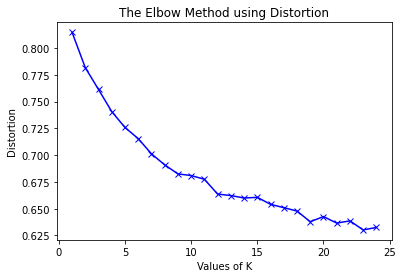

In [50]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

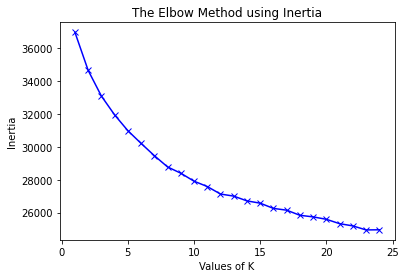

In [51]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

The elbow seems to be around k = 10

In [59]:
# 4 Clusters
num_clusters = 4
kmeans_model = KMeans(n_clusters = num_clusters)
pred_clusters_0 = kmeans_model.fit_predict(wv2.vectors)

# 6 Clusters
num_clusters = 6
kmeans_model = KMeans(n_clusters = num_clusters)
pred_clusters_1 = kmeans_model.fit_predict(wv2.vectors)

# 10 Clusters
num_clusters = 10
kmeans_model = KMeans(n_clusters = num_clusters)
pred_clusters_2 = kmeans_model.fit_predict(wv2.vectors)

# 11 Clusters
num_clusters = 11
kmeans_model = KMeans(n_clusters = num_clusters)
pred_clusters_3 = kmeans_model.fit_predict(wv2.vectors)



In [60]:
# 4 Clusters
kmeansdf_0 = pd.DataFrame({'KG entity':wv2.index2word, 'kmeans clusters':pred_clusters_0})
kmeansdf_0.to_csv('4_clusters.csv')

# 6 Clusters
kmeansdf_1 = pd.DataFrame({'KG entity':wv2.index2word, 'kmeans clusters':pred_clusters_1})
kmeansdf_1.to_csv('6_clusters.csv')

# 10 Clusters
kmeansdf_2 = pd.DataFrame({'KG entity':wv2.index2word, 'kmeans clusters':pred_clusters_2})
kmeansdf_2.to_csv('10_clusters.csv')

# 11 Clusters
kmeansdf_3 = pd.DataFrame({'KG entity':wv2.index2word, 'kmeans clusters':pred_clusters_3})
kmeansdf_3.to_csv('11_clusters.csv')

## 6.2 Perform PCA dimension reduction

In [54]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(wv2.vectors)
principaldf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

## 6.3 Visualise clusters

In [61]:
# 4 Clusters
kmeansdf_0 = pd.merge(principaldf,kmeansdf_0, left_index=True, right_index=True)

# 6 Clusters
kmeansdf_1 = pd.merge(principaldf,kmeansdf_1, left_index=True, right_index=True)

# 10 Clusters
kmeansdf_2 = pd.merge(principaldf,kmeansdf_2, left_index=True, right_index=True)

# 11 Clusters
kmeansdf_3 = pd.merge(principaldf,kmeansdf_3, left_index=True, right_index=True)

### 6.3.0 Four K-means Clusters

In [62]:
source = kmeansdf_0
chart = alt.Chart(source).mark_circle(size=20, opacity = 1).encode(x='principal component 1:Q',y='principal component 2:Q',
                                                        color = 'kmeans clusters:N'
                                                        ).properties(
                                                        width=800,
                                                        height=800).interactive()
chart

alt.Chart(...)

### 6.3.1 Six K-means Clusters

In [63]:
source = kmeansdf_1
chart = alt.Chart(source).mark_circle(size=20, opacity = 1).encode(x='principal component 1:Q',y='principal component 2:Q',
                                                        color = 'kmeans clusters:N'
                                                        ).properties(
                                                        width=800,
                                                        height=800).interactive()
chart

alt.Chart(...)

### 6.3.2 Ten K-means Cluster 

In [64]:
source = kmeansdf_2
chart = alt.Chart(source).mark_circle(size=20, opacity = 1).encode(x='principal component 1:Q',y='principal component 2:Q',
                                                        color = 'kmeans clusters:N'
                                                        ).properties(
                                                        width=800,
                                                        height=800).interactive()
chart

alt.Chart(...)

### 6.3.3 Eleven K-means Cluster

In [66]:
source = kmeansdf_3
chart = alt.Chart(source).mark_circle(size=20, opacity = 1).encode(x='principal component 1:Q',y='principal component 2:Q',
                                                        color = 'kmeans clusters:N'
                                                        ).properties(
                                                        width=800,
                                                        height=800).interactive()
chart

alt.Chart(...)